<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Python en ciencias e ingeniería: tutoriales basados en ejemplos</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Sergio Gutiérrez Rodrigo y Adrián Navas Montilla</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Licencia Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional</a>.

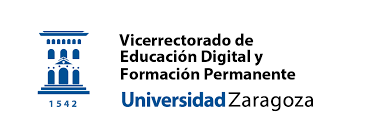

---
Producción de contenidos educativos digitales UNIZAR 2022-2023

**Objetos de aprendizaje abiertos del Vicerrectorado de Educación Digital y Formación Permanente de la Universidad de Zaragoza en el marco del Proyecto UniProducción incluido en el Plan UniDigital.**
---



## <center> Método de Diferencias Finitas en el Dominio del Tiempo </center>


-----------------------------------------


La intuición de Michael Faraday acerca de la existencia de líneas de fuerza invisibles asociadas a la electricidad y el magnetismo, junto con la obra posterior de James Clerck Maxwell, un formalismo matemático que daba cuenta de los fenómenos eléctricos y magnéticos conocidos hasta mediados del siglo XIX, abrieron una caja de Pandora sin precedentes. Maxwell demostró en 1864 que la luz visible es una onda electromagnética y predijo la existencia de otros tipos de ondas invisibles al ojo humano. Sus predicciones fueron demostradas en 1888 por Heinrich Hertz y este hecho no tardaría mucho en cambiar por completo nuestro mundo. Desde la invención de la radio o el RADAR, hasta nuestros días, con el desarrollo de la Nanofotónica, los fenómenos relacionados con la luz no han dejado de hacer avanzar a las sociedades modernas. Las tecnologías basadas en la luz cambiaron el curso de una guerra, nos conectan con el Universo y con el resto de seres humanos y algún día nos proporcionarán energía ilimitada si conseguimos dominar los secretos de la fotosíntesis [1].

El método FDTD se ha aplicado en una gran variedad de problemas de ingeniería y física desde que originalmente fue propuesto en 1966 por K. Yee [2]. El método FDTD se ha desarrollado a lo largo de los años, siendo uno de los métodos más difundidos en el electromagnetismo computacional a nivel mundial. En pocas palabras, las propiedades ópticas de un sistema dado (una célula viva, un avión, una nanoestructura...) se obtienen a través de cálculos del campo electromagnético, que se propaga en un espacio/tiempo discretizado, de acuerdo con las ecuaciones de Maxwell y las condiciones de contorno (que indican cómo responden los materiales al campo EM). El FDTD proporciona así la "película" completa de la evolución del campo electromagnético de un sistema dado. Esta información se procesa posteriormente para obtener la respuesta EM del sistema considerado.

[1] Bodanis, M. (2005). Electric Universe. How electricity switched on the modern world. Abacus.

[2] A. Taflove, S.C. Hagness, Computational Electrodynamics: The Finite-Difference Time-Domain Method, 3rd edn. (ArtechHouse, Boston, 2005).



# Simulador de ondas planas

- Incorpora unas rudimentarias capas de absorción en los extremos límite de la simulación.


In [ ]:
%matplotlib inline
import numpy as np
from math import pi, sin,cos,sqrt,exp
from matplotlib import pyplot as plt
from matplotlib import animation

# Constantes físicas. Unidades en el Sistema Internacional (SI)
c       = 299792458.0        # m/s
eps0    = 8.854187817e-12    # F·m-1
mu0     = 1.0/(eps0*(c**2))  # N·A-2


# Parámetros iniciales FDTD
nx = 2000                    # Número de puntos en los que se discretiza la dirección de propagación (dirección x)
dx = 0.001                   # Tamaño de la celda unidad en metros
L= nx*dx                     # Longitud del sistema en metros
x_source = 5                 # Una onda plana se excita en la posición/celda x=x_source
nsteps = 2000                # Pasos temporales
dt = dx/(c*sqrt(1.0))        # Paso temporal en segundos
                             # Hay que tener cuidado y definirlo como está, debido a la restricción del algoritmo de Yee
                             # que impone el criterio de estabilidad en el que dt <= dx/(c*sqrt(3)) para sistemas 3D

# Onda sinusoidad propagándose en la dirección x y polarizada linealmente en la dirección y.
ey = np.zeros(nx)  # Se define el vector que contendrá la componente Ey en todos los puntos definidos en el dominio
bz = np.zeros(nx)  # Se define el vector que contendrá la componente Bz en todos los puntos definidos en el dominio

# Frecuencia incidente
freq_in=2.45e9  # frecuencia en Hz

print("------------------------------------------------------")
print("Método de Diferencias Finitas en el Dominio del Tiempo")
print("(FDTD, Finite-Difference Time-Domain)")
print("------------------------------------------------------ \n")
print("Tamaño de la simulación de ",L," m")
print("Pasos necesarios para recorrer todo el sistema=",int(L/(c*dt)))

# Variables para definir las condiciones de contorno
boundary_low = [0, 0]
boundary_high = [0, 0]

# Cada show_step veces muestra el tiempo simulado
show_step=500

# Se guarda ey en cada uno de los instantes fijados por show_step
ey_plt = np.zeros((nsteps,nx))

'''
El algoritmo FDTD
'''
# Loop FDTD principal
print(".................................................................")
print("\n Empieza a correr el algoritmo FDTD...")
for time_step in range(0, nsteps):
    if(time_step % show_step == 0): # Cada show_step veces muestra el tiempo simulado
        print("Método FDTD calculando, paso temporal ",time_step," de ",nsteps)

    # Se calcula la componente Ey del campo EM para las posiciones dadas
    for k in range(1, nx):
        ey[k] = ey[k] - (dt/(dx*mu0*eps0))*(bz[k] - bz[k-1])
        # Una onda plana se excita en x=x_source
        pulse =sin(2 * pi * freq_in * dt * time_step)
        ey[x_source]=ey[x_source]-pulse # Se introduce la fuente(corriente) en el FDTD (campo eléctrico)

        # Condiciones de absorbente en los extremos
        ey[0] = boundary_low.pop(0)
        boundary_low.append(ey[1])
        ey[nx - 1] = boundary_high.pop(0)
        boundary_high.append(ey[nx - 2])

    # Se calcula la componente Bz del campo EM para las posiciones dadas
    for k in range(0,nx - 1):
        bz[k] = bz[k] - (dt/dx)*(ey[k+1] - ey[k])
        bz[x_source]=bz[x_source]- (dt/dx)*pulse  # Se introduce la fuente en el FDTD (campo magnético)

    # Guarda Ey en todos los instantes de tiempo y todos los puntos nx
    for k in range (1,nx):
        ey_plt[time_step,k]=ey[k]



------------------------------------------------------
Método de Diferencias Finitas en el Dominio del Tiempo
(FDTD, Finite-Difference Time-Domain)
------------------------------------------------------ 

Tamaño de la simulación de  2.0  m
Pasos necesarios para recorrer todo el sistema= 2000
.................................................................

 Empieza a correr el algoritmo FDTD...
Método FDTD calculando, paso temporal  0  de  2000
Método FDTD calculando, paso temporal  500  de  2000
Método FDTD calculando, paso temporal  1000  de  2000
Método FDTD calculando, paso temporal  1500  de  2000


# Representación gráfica y evolución temporal

.................................................................

 La película se crea en el mismo directorio en el que está este archivo 
 y se llama fdtd_onda_plana.mp4

 Empieza la animación...
Creando animación, paso  0  de  500
Creando animación, paso  50  de  500
Creando animación, paso  100  de  500
Creando animación, paso  150  de  500
Creando animación, paso  200  de  500
Creando animación, paso  250  de  500
Creando animación, paso  300  de  500
Creando animación, paso  350  de  500
Creando animación, paso  400  de  500
Creando animación, paso  450  de  500


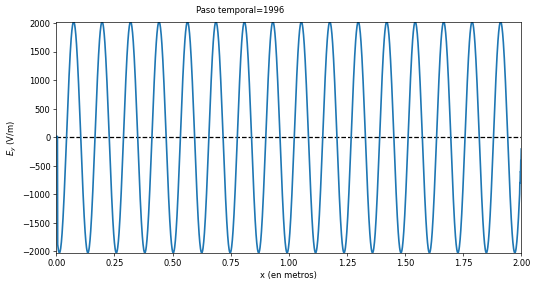

In [ ]:
'''
A continuación el código que se utiliza para pintar gráficos.
La mayor parte de las líneas pueden tomarse como una receta a seguir.
No es necesario entender exactamente qué hacen
'''
# Definición de la figura y los elementos comunes (ejes...)
fig = plt.figure(dpi=60,   figsize=(10,5))
ax = plt.axes(xlim=(0, dx*nx), ylim=(-np.max(ey_plt), np.max(ey_plt)))
ax.set_xlabel("x (en metros)")
ax.set_ylabel("$E_y$ (V/m)")
ax.axhline(y=0, color='k', linestyle='--')
line, = ax.plot([], [], lw=2)
title = ax.text(.3, 1.05, '', transform = ax.transAxes, va='center')
ax.xaxis.set_animated(True)
# Función que inicializa el primer fotograma
def init():
    title.set_text("")
    line.set_data([], [])
    return line,title
# Función para la animación. Cuando se genera cada uno de los fotogramas es llamada.
show_step=50
no_frames = 500
print(".................................................................")
print("\n La película se crea en el mismo directorio en el que está este archivo \n y se llama fdtd_onda_plana.mp4")
print("\n Empieza la animación...")
def animate(i):
    if(i % show_step == 0): # Cada show_step veces muestra el tiempo simulado
        print("Creando animación, paso ",i," de ", no_frames)
    x = np.linspace(0, nx*dx, nx)
    resolution=int(nsteps/no_frames)
    y = ey_plt[resolution*i]
    line.set_data(x, y)
    title.set_text("Paso temporal="+str(resolution*i))
    return line,title
# LLama al "animador", la función que genera la película.
# Con blit=True solo las partes que cambian de fotograma a fotograma cambian.
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=no_frames, interval=200, blit=True)
# Guarda la animación como mp4. Reguiere tener instalado ffmpeg o mencoder
anim.save('fdtd_onda_plana.mp4', fps=10, extra_args=['-vcodec', 'libx264'])
plt.show()